In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btc-daily-csv/BTC-Daily.csv
/kaggle/input/advertising-csv/advertising (2).csv


In [27]:
import pandas as pd
path = "/kaggle/input/advertising-csv/advertising (2).csv"
data = pd.read_csv(path).to_numpy()

In [28]:
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

In [29]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / maxi - mini
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg
X_b, maxi, mini, avg = mean_normalization(X)

In [30]:
import numpy as np

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # Khởi tạo tham số ngẫu nhiên (ở đây sử dụng giá trị sẵn cho bài tập)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = len(y)  # Số lượng mẫu

    for epoch in range(n_epochs):
        for i in range(N):
            # Lấy mẫu ngẫu nhiên từ dữ liệu (ở đây sử dụng tuần tự theo chỉ số i)
            xi = X_b[i:i+1]
            yi = y[i:i+1]

            y_hat = xi.dot(thetas)

            loss = y_hat - yi
            losses.append(loss[0][0]**2 / 2)

            gradient = xi.T.dot(loss)

            thetas = thetas - learning_rate * gradient

            thetas_path.append(thetas)
    
    return thetas_path, losses


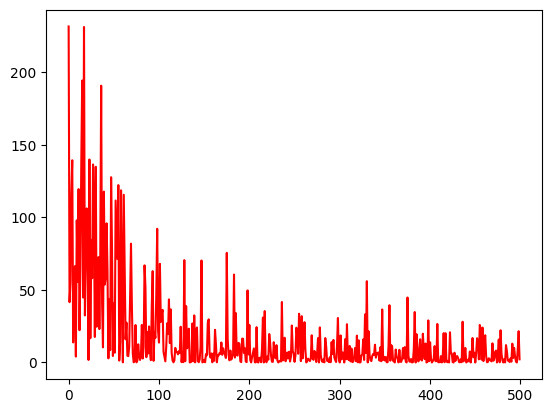

In [31]:
import matplotlib.pyplot as plt
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs =50,learning_rate =0.01)
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color ="r")
plt.show()

In [32]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =1 , learning_rate=0.01 )
print ( np .sum( losses ) )

6754.643359356192


In [33]:
import numpy as np

def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # Khởi tạo tham số ngẫu nhiên (ở đây sử dụng giá trị sẵn cho bài tập)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = len(y)

    for epoch in range(n_epochs):
#         shuffled_indices = np.random.permutation(N)
        shuffled_indices = np.asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            y_hat = xi.dot(thetas)

            loss = y_hat - yi
            loss_mean = np.sum(loss**2) / (2 * minibatch_size)  # Tính trung bình loss của mini-batch
            losses.append(loss_mean)

            gradient = xi.T.dot(loss) / minibatch_size
            
            thetas = thetas - learning_rate * gradient

            thetas_path.append(thetas)
    
    return thetas_path, losses

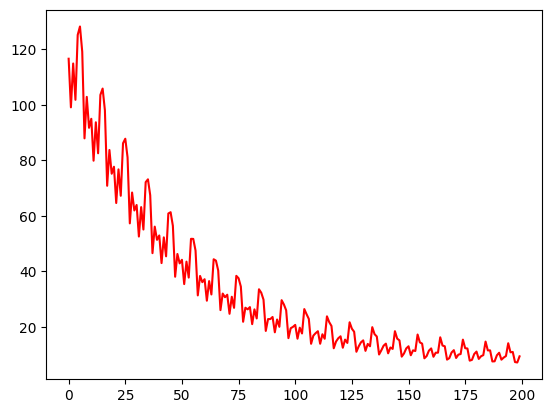

In [34]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
x_axis = list ( range (200) )
plt . plot ( x_axis , losses [:200] , color ="r")
plt . show ()

In [35]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

8865.65


In [36]:
def batch_gradient_descent( X_b , y , n_epochs =100 , learning_rate =0.01) :
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    N = len(y)
    
    for i in range(n_epochs):
        y_hat = X_b.dot(thetas)
        loss = y_hat - y
        loss_mean = np.sum(loss**2) / (2 * N)  # Tính trung bình loss của mini-batch
        losses.append(loss_mean)

        gradient = X_b.T.dot(loss) / N
            
        thetas = thetas - learning_rate * gradient

        thetas_path.append(thetas)
    return thetas_path, losses

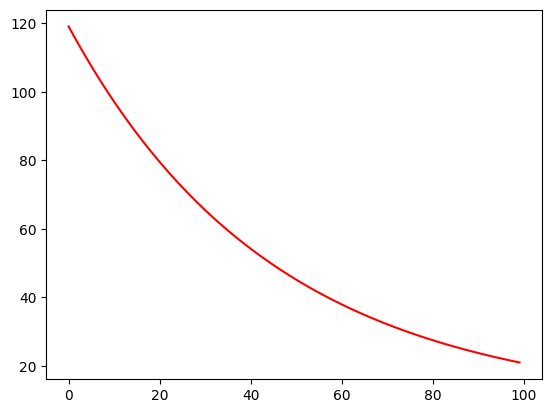

In [37]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate =0.01)
x_axis = list ( range (100) )
plt.plot( x_axis , losses [:100] , color ="r")
plt.show()

In [38]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
print ( round ( sum( losses ) ,2) )

5353.15


## 2. Bitcoin forecasting:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/btc-daily-csv/BTC-Daily.csv")
df = df.drop_duplicates()
df.head()

unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close   Volume BTC    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        2651 non-null   int64         
 1   date        2651 non-null   datetime64[ns]
 2   symbol      2651 non-null   object        
 3   open        2651 non-null   float64       
 4   high        2651 non-null   float64       
 5   low         2651 non-null   float64       
 6   close       2651 non-null   float64       
 7   Volume BTC  2651 non-null   float64       
 8   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 186.5+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
data_range = f"{df['date'].dt.date.min()} to {df['date'].dt.date.max()}"
print(data_range)

2014-11-28 to 2022-03-01


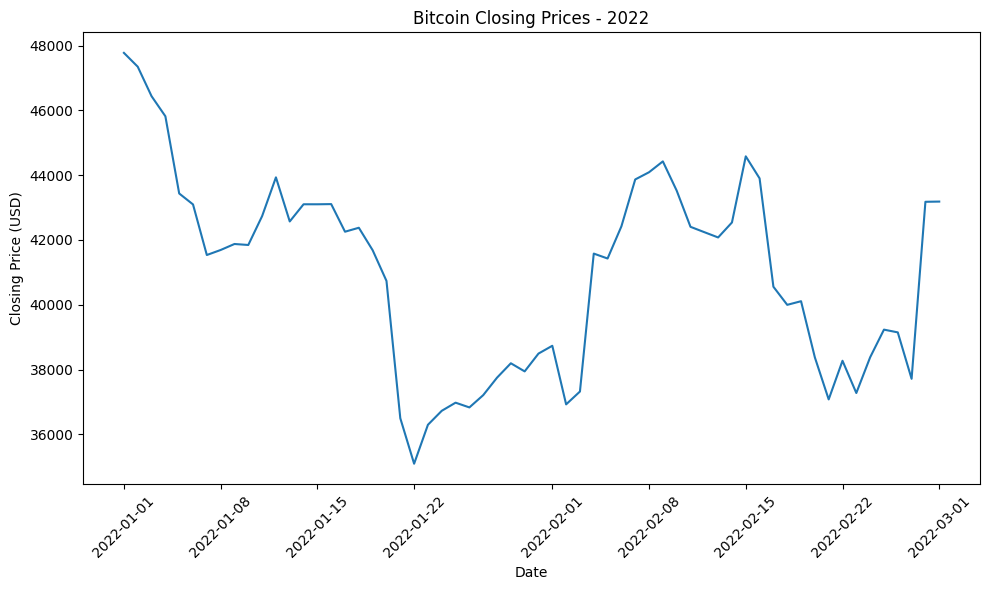

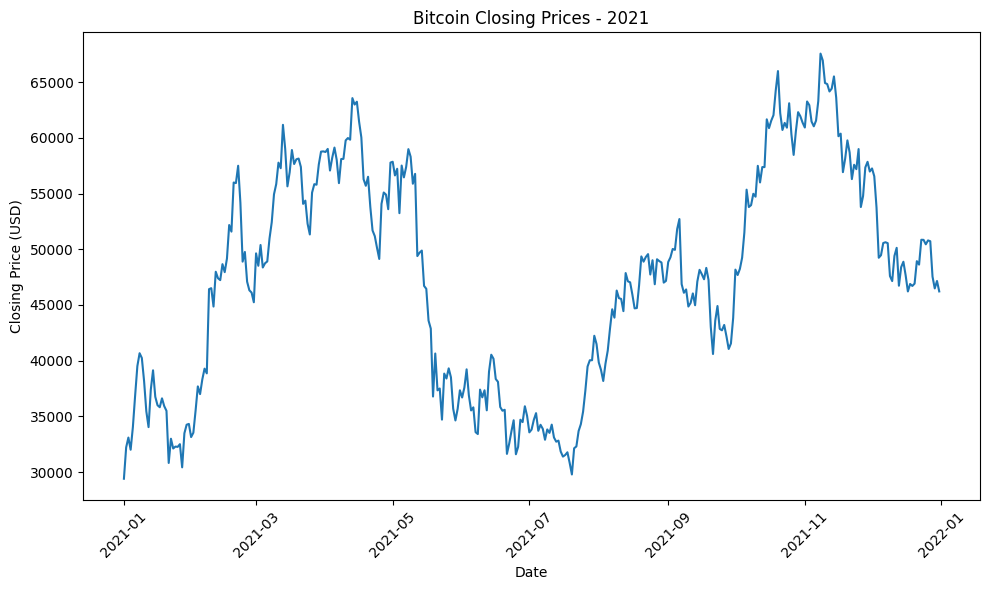

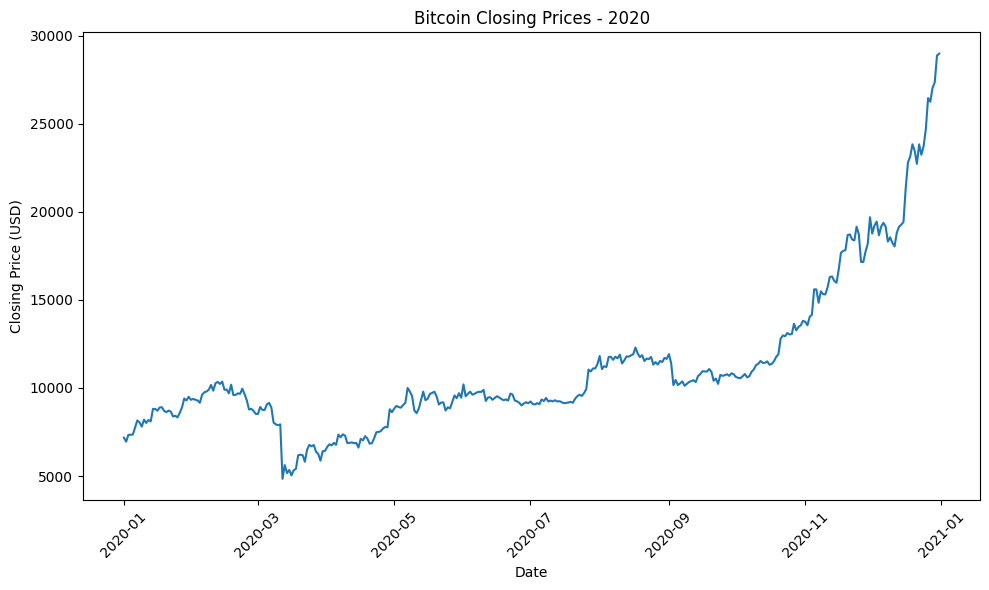

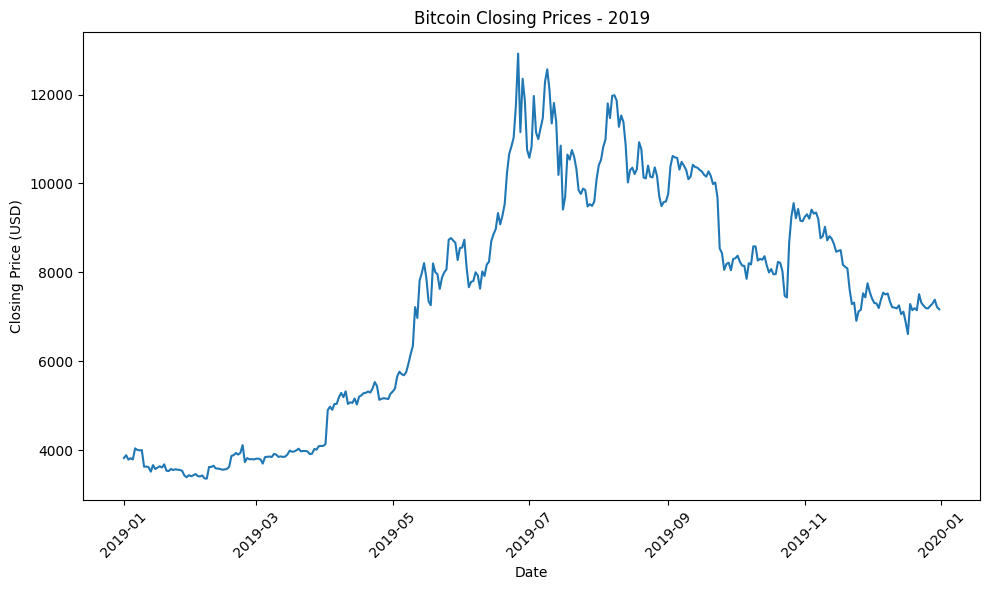

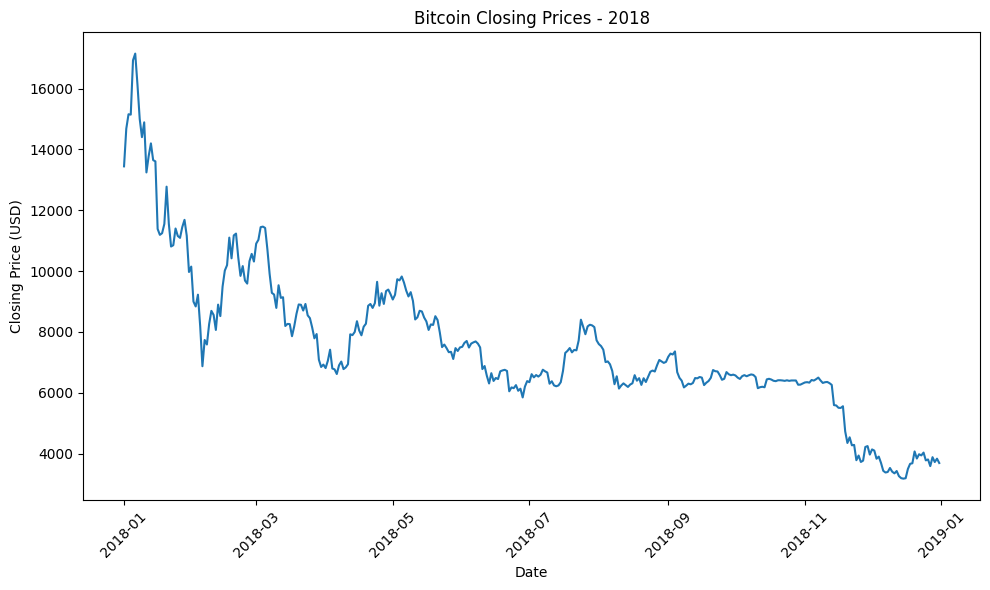

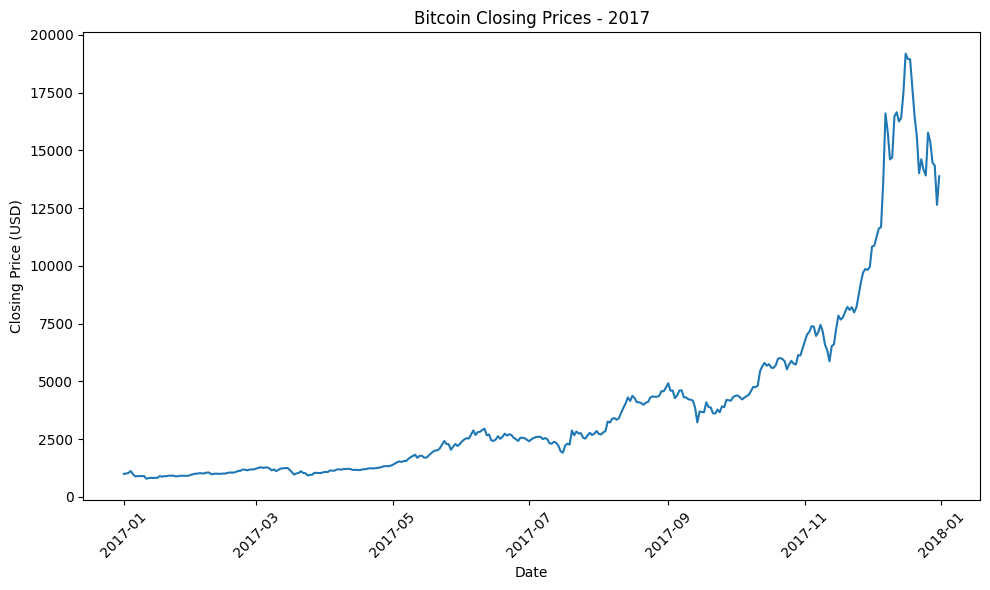

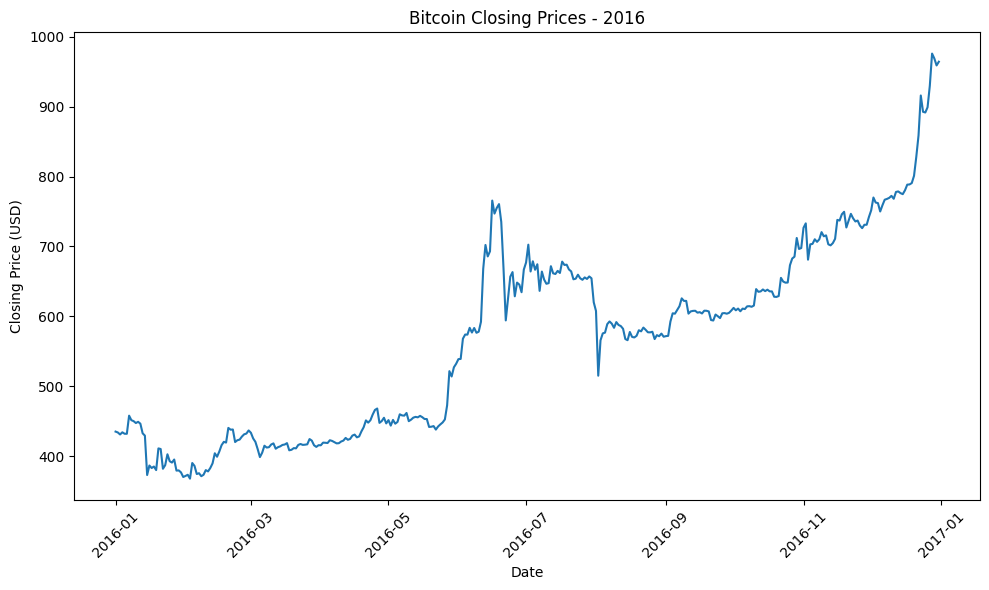

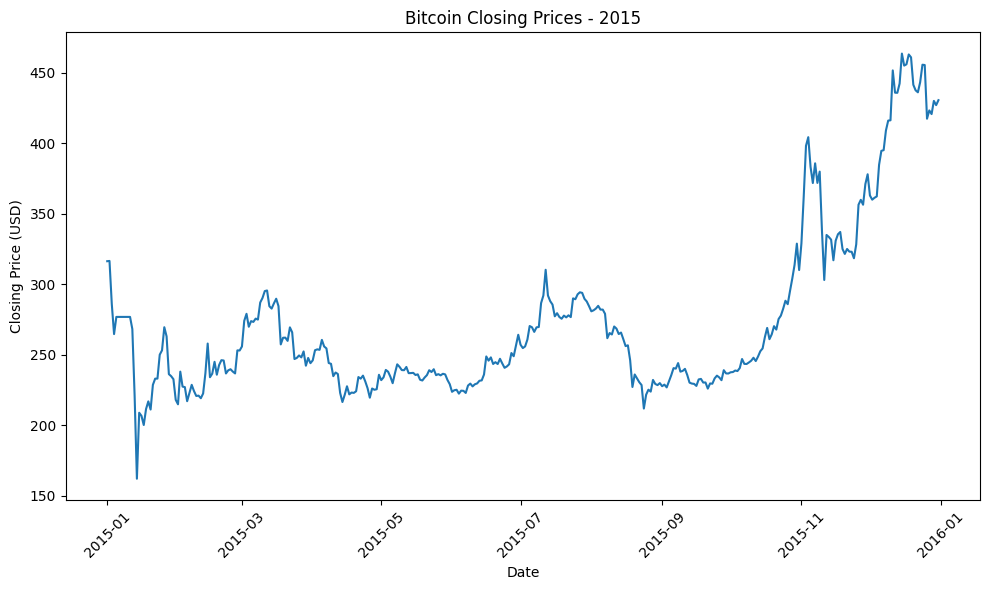

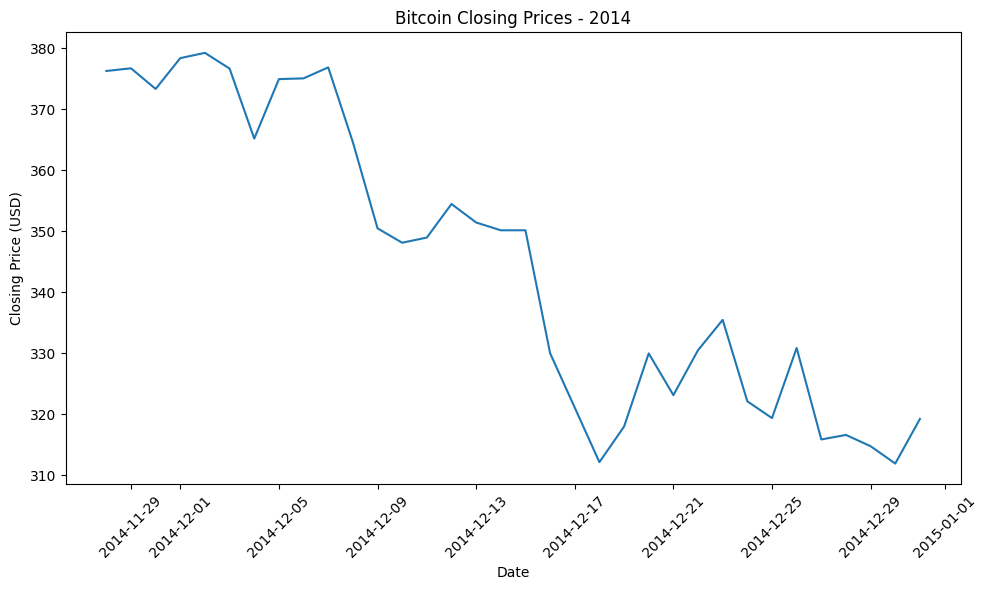

In [5]:
unique_years = df['date'].dt.year.unique()
for year in unique_years:
    # Lọc dữ liệu của từng năm
    year_data = df[df['date'].dt.year == year]
    
    plt.figure(figsize=(10, 6))
    plt.plot(year_data['date'], year_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


/tmp/ipykernel_30/3724165704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


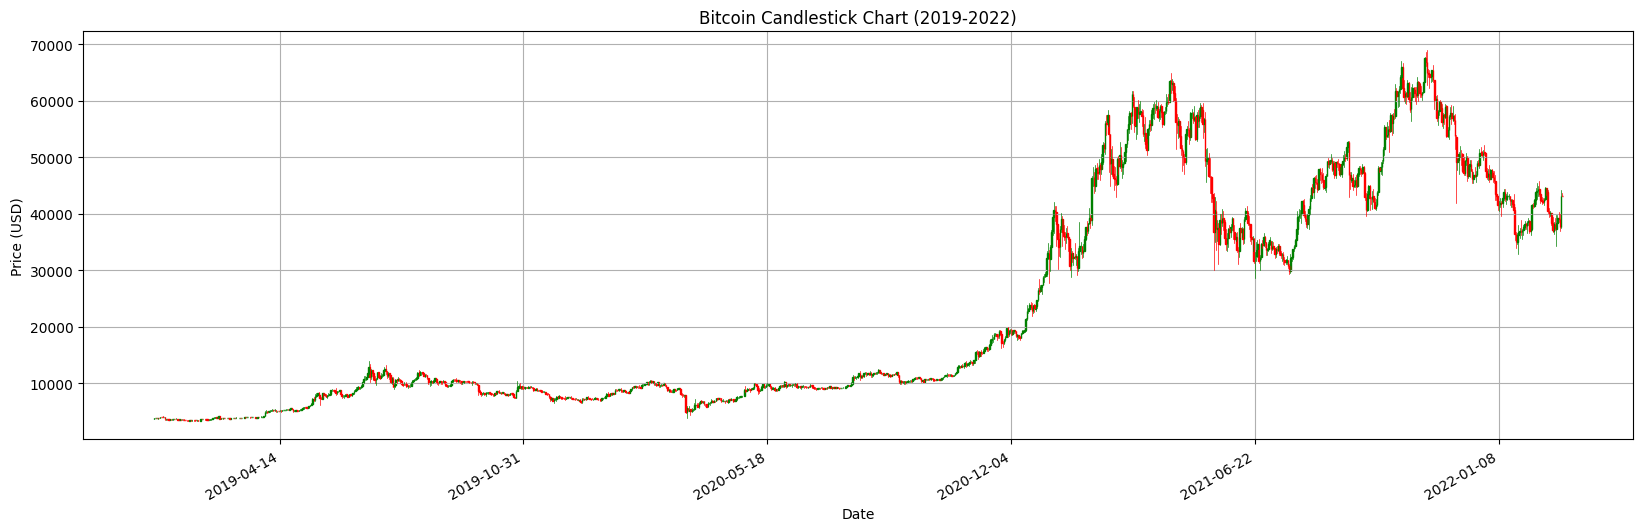

In [7]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Lọc dữ liệu cho giai đoạn từ 2019 đến 2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Chuyển đổi cột 'date' sang định dạng số (dành cho việc vẽ biểu đồ)
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Tạo biểu đồ nến
fig, ax = plt.subplots(figsize=(20, 6))

# Vẽ biểu đồ nến dựa trên dữ liệu 'open', 'high', 'low', 'close'
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

# Định dạng trục x hiển thị ngày tháng
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [19]:
def predict(X, w, b):
    return X@w + b

def gradient(y_hat, y, X):
    loss = y_hat - y

    dw = X.T@loss / len(y)
    db = np.sum(loss) / len(y)

    cost = np.sum(loss ** 2) / (2 * len(y))
    
    return (dw, db, cost)

def update_weight(w, b, lr, dw ,db) :
    w_new = w - lr*dw
    b_new = b - lr*db
    return ( w_new , b_new )

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = df[['open', 'high', 'low']].values
y = df['close'].values.reshape(-1,1)

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y).reshape(2651)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print(X_train[:10], y_train[:10])

[[ 1.29348718  1.25914537  1.29127464]
 [-0.64640332 -0.64701909 -0.64399461]
 [-0.12339046 -0.13483223 -0.20989307]
 [-0.68109526 -0.68248319 -0.67987231]
 [-0.26427937 -0.25325901 -0.24986296]
 [-0.67348101 -0.67432835 -0.67228799]
 [-0.06803715 -0.08212395 -0.05310543]
 [-0.05412644 -0.05691733 -0.04655196]
 [-0.32500717 -0.33582434 -0.317495  ]
 [ 2.72334372  2.71958836  2.71731191]] [ 1.29695545 -0.64538398 -0.19487334 -0.68145375 -0.2450704  -0.67343033
 -0.06975906 -0.04437183 -0.33073587  2.71665576]


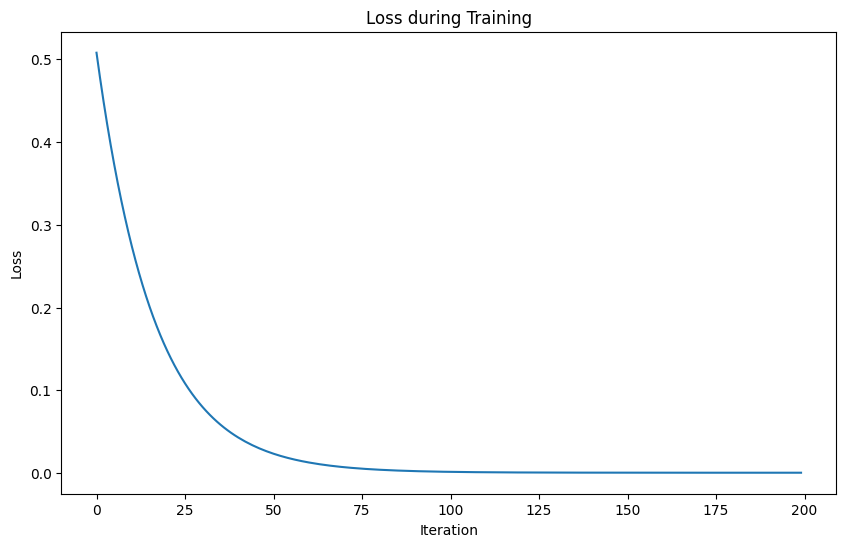

In [46]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    # Vòng lặp Gradient Descent
    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)

    return w, b, losses

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
w, b, losses = linear_regression_vectorized(X_train, y_train, learning_rate=0.01, num_iterations=200)

# Vẽ biểu đồ hàm mất mát qua các lần lặp
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.show()

In [47]:
from sklearn.metrics import r2_score
import numpy as np

# Dự đoán trên tập kiểm tra
y_pred = predict(X_test, w, b)

# Tính Error
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
mae = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Tính R-squared (R²) cho tập huấn luyện và tập kiểm tra
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 4), "%")
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Mean Absolute Percentage Error (MAPE): 5.8325 %
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


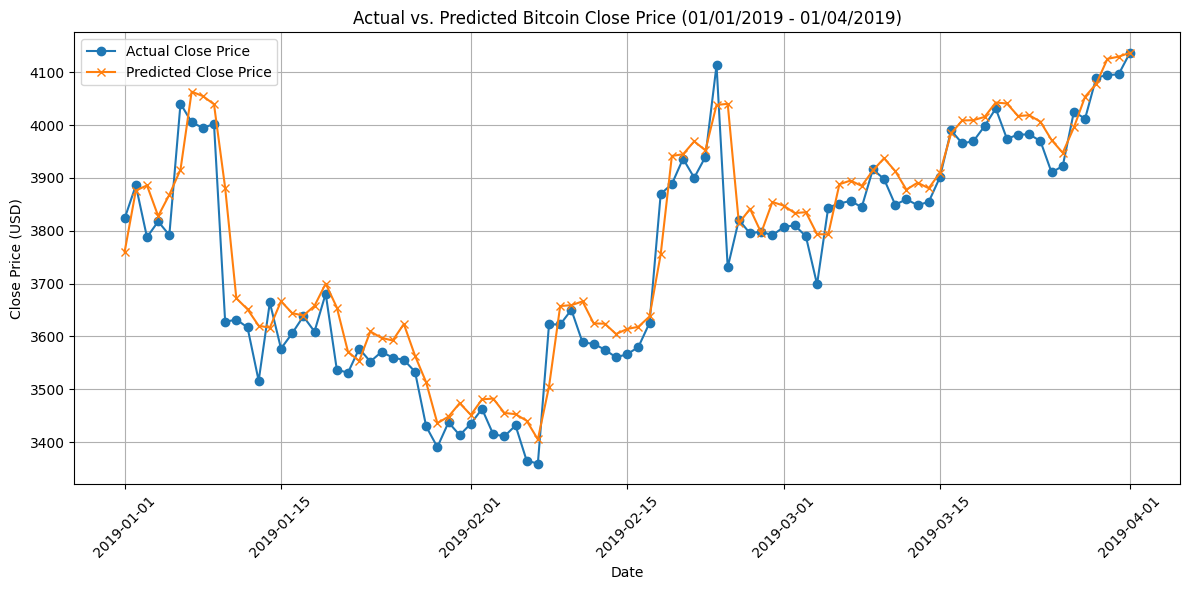

In [48]:
# Lọc dữ liệu từ 01/01/2019 đến 01/04/2019
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Chuẩn bị dữ liệu X và y để dự đoán
X_2019_q1 = df_2019_q1[['open', 'high', 'low']].values
y_2019_q1_actual = df_2019_q1['close'].values

# Chuẩn hóa dữ liệu đầu vào giống như trước
X_2019_q1_scaled = scaler_X.transform(X_2019_q1)

# Dự đoán giá trị y (giá đóng cửa)
y_2019_q1_pred = scaler_y.inverse_transform(predict(X_2019_q1_scaled, w, b).reshape(-1,1))

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Using LSTM